# Machine Learning using Keras Tensorflow

# Treinamento de Rede Neural para Classificação - Fashion MNIST Dataset
<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="450">

##### Copyright 2018 The TensorFlow Authors.

### Bibliotecas requeridas


Conferindo se a última versão do [TensorFlow](https://www.tensorflow.org/tutorials) está instalada

In [217]:
import mlflow

In [218]:
# Utilizando gerenciador de pacotes do python (pip)
# para instalação do TensorFlow.
!pip install tensorflow

Vamos também importar todas as bibliotecas necessárias para execução do código.

In [219]:
# Instalando bibliotecas de utilidades
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.


Already up to date.


<module 'ssp19ai_utils.utils' from '/home/isac/Documentos/mlfow com jupyter notebook/ssp19ai_utils/utils.py'>

In [220]:
%matplotlib inline
from __future__ import absolute_import, division, print_function, unicode_literals

# Importando TensorFlow e tf.keras
import tensorflow as tf # Framework para execução dos modelos
from tensorflow import keras # Onde encontramos os modelos para instaciamento
from tensorflow.keras.utils import to_categorical # Utilidades. Conversão de atributos numéricos para categóricas
from sklearn.utils import shuffle # Método para embaralhamento dos dados
from sklearn.model_selection import train_test_split # Divisão de dados

import numpy as np # Biblioteca para operações matemáticas/matriciais
import matplotlib.pyplot as plt # Biblioteca para vizualização
import time

print("TensorFlow version is " + tf.__version__)

TensorFlow version is 2.14.0


## Importando o dataset Fashion MNIST

Podemos encontrar aqui um guia para utilização do [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, o qual contém 70,000 imagens em escala cinza, dividas em 10 classes. As imagens se referem a artigos de roupa em uma baixa resolução (28 by 28 pixels), como visto abaixo.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Utilzaremos aqui 60,000 imagens para treinar a rede e 10,000 imagens para avaliar o quão boa está a rede treinada para classificar imagens. Podemos acessar o Fashion MNIST dataset diretamente do TensorFlow, somente importando e carregando os dados.

In [221]:
fashion_mnist = keras.datasets.fashion_mnist
# Cada imagem  será carregada com seu respectivo label/classe correspondente
# train imagens -> train_labels
# test_images -> test_labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [222]:
import pandas as pd
print(type(train_images), train_images.shape)
#df = pd.DataFrame(train_images, columns = ['imagem','linha','coluna'])
#df

<class 'numpy.ndarray'> (60000, 28, 28)


Carregando o dataset em quatro arrays:

* O `train_images` e `train_labels` arrays são o conjunto de treino que o modelo sará para aprender
* O modelo será testato sobre o conjunto de teste, `test_images` e `test_labels` arrays.

As imagens são arrays de dimensões 28x28, os pixels variam entre 0 e 255.
Os *labels* são arrays de inteiros, com valores entre 0 a 9, correspondendo a *classe* de roupa que cada imagem representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>
Cada imagem é mapeada para uma única classe/label. Desde que os nomes das classes não estão inclusos no dataset (nome dos artigo de roupa), vamos guardar em uma variável para posteriormente utiliza-las  para plot das imagens classificadas.

In [223]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorando os dados

Vamos explorar o formato do nosso dataset antes do treinamento. O código abaixo nos mostra que temos 60,000 imagens, cada um repsentada por uma matriz de 28x28 pixels.

In [224]:
train_images.shape

(60000, 28, 28)

Como esperado, temos também 60,000 labels para o conjunto de treino:

In [225]:
len(train_labels)

60000

Cada label é um inteiro variando de 0 a 9:

In [226]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Como dito, temos 10,000 imagens no conjunto de teste, cada imagem sendo representada por uma matriz de 28x28 pixels:


In [227]:
test_images.shape

(10000, 28, 28)

E o conjunto de teste é também formado por 10,000 labels

In [228]:
len(test_labels)

10000

## Processando os dados

O data set deve ser processando antes de efetuar o treinamento da rede. Se inspecionarmos a primeira imagem do conjunto de treino, veremos os pixels de fato variam entre 0 e 255

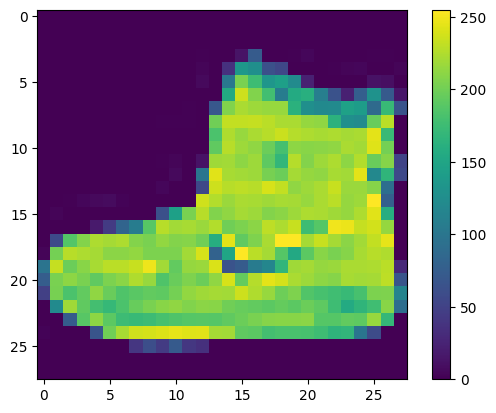

the label is: 9


In [229]:
utils.plot_image(train_images, train_labels, cmap=None)

Faremos uma escala nos valores dos pixels para variarem entre 0 e 1 antes de alimentarmos a rede. Para isso, dividiremos os valores por 255. É importante que o conjunto de treino e teste sejam processados da mesma forma.

In [230]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Plotando as primeiras 25 imagens do conjunto de treino com seu respectivo nome. Após a verificação que os dados estão no formato correto, estamos prontos para treinar nossa rede.

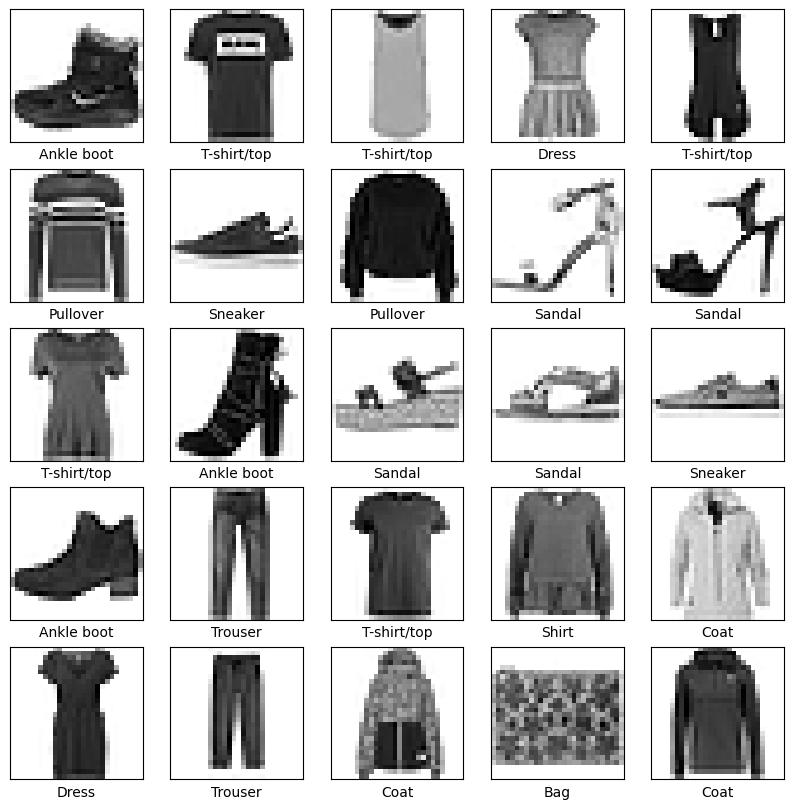

In [231]:
utils.plot_multi_images(train_images, train_labels, class_names)

## Construindo o modelo

Para construção, precisamos configurar as camadas da rede e posteriormente compilar o modelo.

### Configuração das camadas.

Os blocos base de uma rede neural são suas camadas. Cada camada é capaz de extrair diferentes representações dos dados, com o aprendizado, tais representações são criadas com informações significantes para o problema.

O aprendizado profundo (deep learning), consiste basicamente em encadear camadas simples. A maioria das camadas, como `tf.keras.layers.Dense` possuem parâmetros que são ajustados durante a aprendizagem.

In [232]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
     keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A classe `Sequential` é utilizada para empilhar de forma linear as camadas para formar um modelo.

Como estamos trabalhando com imagens (representação matricial), primeiramente vamos achatar a entrada de cada imagem (28,28) em um array de uma dimensão 28 * 28 = 784 pixels através do módulo `Flatten`, informando as dimensões da entrada em `input_shape`.

Posteriormente o criaremos uma camada de 128 neurônios, com sua função de ativação sendo a `relu`, através do módulo `Dense`.

A função da rede é realizar um classificação de 10 itens distintos, portanto, sua camada de saída será formada por 10 neurônios, com a função de ativação `softmax`. A camada de saída retornará um array de 10 posições, onde cada posição contém a probabilidade da imagem pertencer a uma das 10 classes.

### Compilando o modelo

Antes de efetuarmos o treinamento do modelo, precisaos realizar algumas configurações, tais configurações são feitas no passo de compilação da rede.

* *Loss function*: Realizar a medida do quão acurado está nosso modelo durante a etapa de treino.

* *Optimizer* — Como nosso modelo irá atualizar seus pesos baseado nos dados e na função de perda.

* *Metrics* — Utilizada para monitorar a etapa de treino e teste. Neste exemplo, utilizaremos a *accuracy* para monitoramento, que nos diz a fração de imagens que estão sendo classificadas corretamente.

In [233]:
model.compile(optimizer='adam',
              jit_compile=False,
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

##Vizualizando o modelo.

Resumo das propriedades do modelo:

In [234]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 128)               100480    
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (Dense)            (None, 10)                170       
                                                                 
Total params: 111514 (435.60 KB)
Trainable params: 111

Draw the model:

In [235]:
#utils.draw_model(model)

## Treinamento do modelo

O treinamento de uma rede neural requer a execução dos seguintes passos.

1. Alimentar a rede com os dados, nesse exemplo, com `train_images` e `train_labels` arrays.
2. O modelo aprender a associar as imagens e labels.
3. Realizar testes no modelo com o conjunto de teste, `test_images` array, e verificar se as predições correspondem com o label correto da imagem, `test_labels` array.

Para inicializar o treinamento, precisamos chamar a função `model.fit`.


In [236]:
start_time = time.time()
epc = 15
vldsplit = .25
history = model.fit(train_images, train_labels, validation_split=vldsplit, epochs=epc, workers=4, use_multiprocessing=False)
end_time = time.time()
elapsed_time = end_time - start_time
print(" - Keras time (sec): ", elapsed_time)

Epoch 1/15
1407/1407 [==============================] - 8s 5ms/step - loss: 0.5800 - accuracy: 0.7946 - val_loss: 0.4299 - val_accuracy: 0.8433
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3992 - accuracy: 0.8566 - val_loss: 0.3943 - val_accuracy: 0.8549
Epoch 3/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3587 - accuracy: 0.8684 - val_loss: 0.3900 - val_accuracy: 0.8589
Epoch 4/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3337 - accuracy: 0.8770 - val_loss: 0.3711 - val_accuracy: 0.8678
Epoch 5/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3148 - accuracy: 0.8829 - val_loss: 0.3331 - val_accuracy: 0.8821
Epoch 6/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2976 - accuracy: 0.8898 - val_loss: 0.3406 - val_accuracy: 0.8768
Epoch 7/15
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2844 - accuracy: 0.8949 - val_loss: 0.3564 - val_accuracy:

De acordo o treinamento do modelo, a perda e acurácia serão exibidas. O modelo criado alcança uma acurácia de 88% no conjunto de treinamento.

## Vizualizando o progresso
Analizaremos como o modelo progride na etapa de treinamento.


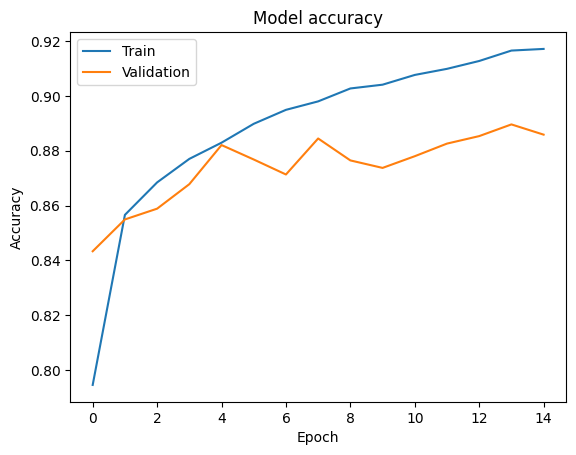

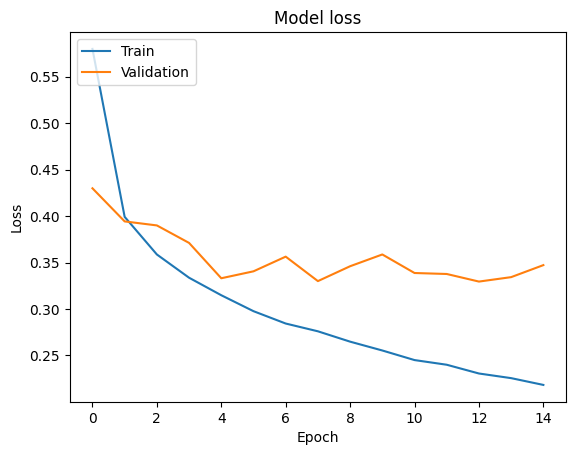

In [237]:
utils.plot_accuracy_and_loss(history)

## Validando a acurácia

Compararemos como o modelo se desempenha no conjunto de teste:


In [238]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Acurácia no cojunto de teste:', test_acc)

with mlflow.start_run():
    mlflow.log_metric("accuracy",test_acc)
    mlflow.log_metric("loss",test_loss)
    mlflow.log_param('ephocs', epc)
    mlflow.log_param('validation_split',vldsplit)
    mlflow.tensorflow.log_model(model, "mlp")
    

313/313 [==============================] - 1s 3ms/step - loss: 0.3789 - accuracy: 0.8759


2023/11/10 18:57:21 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Acurácia no cojunto de teste: 0.8758999705314636
INFO:tensorflow:Assets written to: /tmp/tmplecc86k5/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmplecc86k5/model/data/model/assets


Vemos que a acurácia no conjunto de teste é m pouco menor quando comparada com o conjunto de treino. Essa diferenã de acurácia entre o conjunto de treino e teste é um exemplo de *overfitting*. Overfitting é quando um modelo de machine learning performa pior com dados nunca vistos do que no conjunto de treino.

## Realizando predições

Com o modelo treinado, podemos agora fazer algumas predições sobre as imagens.


In [239]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Aqui, o modelo realizou uma predição para cada imagem no conjunto de teste. Podemos dar uma olhada na primeira tentativa.

In [240]:
predictions[0]

array([2.1951871e-10, 4.1672863e-12, 2.0582952e-08, 8.4811987e-08,
       1.6281705e-07, 3.1653143e-04, 2.1449598e-06, 3.3985004e-02,
       5.4837646e-08, 9.6569610e-01], dtype=float32)

Uma predição é um array de 10 entradas. tais entradas relacionam a "confiança" do modelo de tal imagem pertencer a cada uma das 10 classes de roupas. Podemos ver qual label possui a mior confiança.

In [241]:
predictions[0].argmax()

9

Portanto, o modelo possui uma maior confiança de que a imagem é um *ankle boot*, ou `class_names[9]`. Podemos checar se tal classificação está correta.

In [242]:
test_labels[0]

9

Podemos plotar a imagem e as 10 saídas de confiança da rede.

Vamos verificar primeira imagem, predição e todo o array de probabilidade.

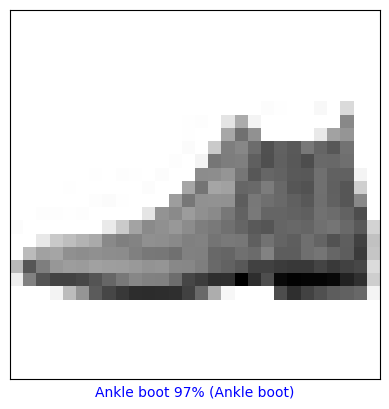

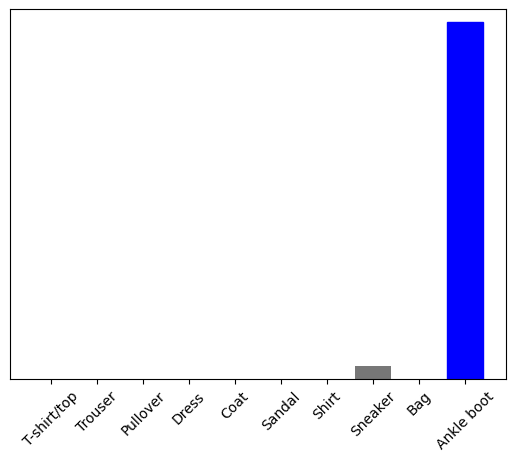

In [243]:
# Vizualizar a primeira imagem:
index = 0
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index, big=True, class_names=class_names)

Vamos verificar para uma imagem distinta.

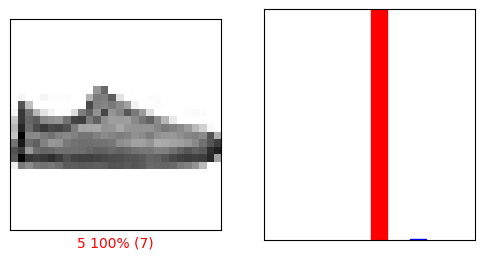

In [244]:
# Vizualizar a 12ª imagem:
index = 12
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index)

Vamos plotar algumas imagens e verificar suas predições. Predições corretas são coloridas com azul, e predições erradas com vermelho.

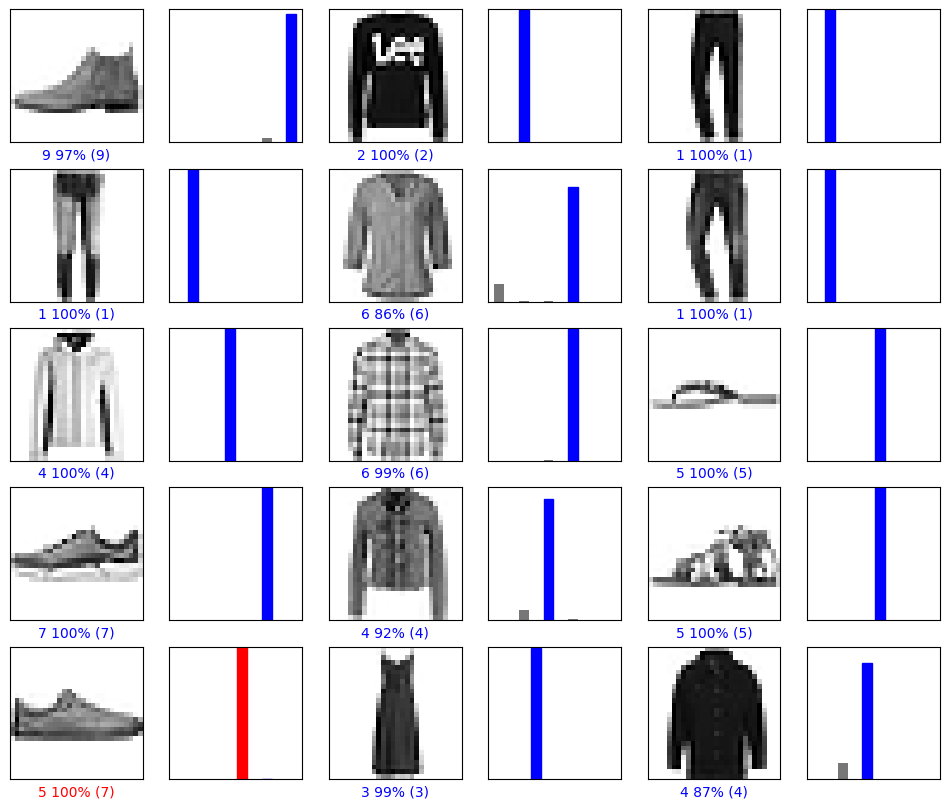

In [245]:
# Plotando as primeiras X imagens, seus labels gerados pela rede e seu label real
utils.plot_multi_images_prob(predictions, test_labels, test_images)

Vizualizando a matriz de confusão

Confusion matrix


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

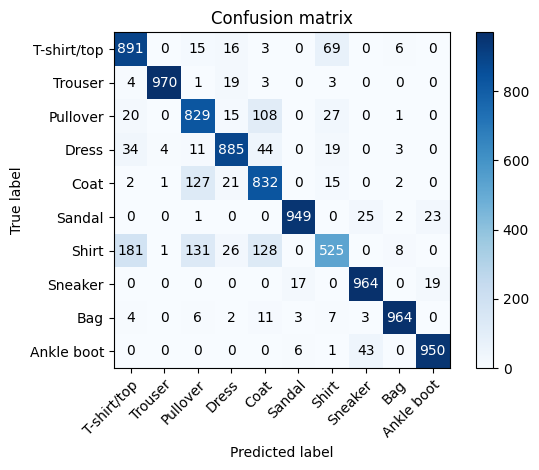

In [246]:
# Convertendo as probabilidades em classes
predicted_classes = utils.label_with_highest_prob(predictions)

# Plotando a matriz
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=test_labels, classes=np.array(class_names))